# PROYECTO INDIVIDUAL N°1 - Machine Learning Operations (MLOps)

# *Parte 1 - Data Engineer*


In [4]:
# Importacion de librerias a utilizar
import pandas as pd

In [5]:
# Ingestamos los datos de las plataformas de streaming  
df_amazon = pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Streaming\amazon_prime_titles.csv')
df_disney = pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Streaming\disney_plus_titles.csv')
df_hulu = pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Streaming\hulu_titles.csv')
df_netflix = pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Streaming\netflix_titles.csv')

In [6]:
# Ingestamos los datos de ratings
df_rating_1= pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Ratings\1.csv')
df_rating_2= pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Ratings\2.csv')
df_rating_3= pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Ratings\3.csv')
df_rating_4= pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Ratings\4.csv')
df_rating_5= pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Ratings\5.csv')
df_rating_6= pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Ratings\6.csv')
df_rating_7= pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Ratings\7.csv')
df_rating_8= pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS 1\MLOpsReviews\Datos Ratings\8.csv')

### _Análisis Exploratorio De Los Datos_

In [7]:
# Verificamos los tipos de datos de las columnas de cada dataframe streaming para una posterior concatenacion de estos 
# Como a su vez ver si hay valores nulos
df_amazon.info()
df_disney.info()
df_hulu.info()
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          

### _Transformación De Los Datos_

In [8]:
# Encontramos que el tipo de dato de la columna 'cast' de 'df_hulu' era distinto de los demas archivos, por esto 
# se procede a pasarla al tipo de datos de las demas, en este caso a tipo object
df_hulu['cast'] = df_hulu['cast'].astype(object)
df_hulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3073 non-null   object
 1   type          3073 non-null   object
 2   title         3073 non-null   object
 3   director      3 non-null      object
 4   cast          0 non-null      object
 5   country       1620 non-null   object
 6   date_added    3045 non-null   object
 7   release_year  3073 non-null   int64 
 8   rating        2553 non-null   object
 9   duration      2594 non-null   object
 10  listed_in     3073 non-null   object
 11  description   3069 non-null   object
dtypes: int64(1), object(11)
memory usage: 288.2+ KB


In [9]:
# Agregamos un id a los dataframe de streaming, el cual es generado por la primera letra de la plataforma + la columna show_id
df_amazon['id'] = 'a' + df_amazon['show_id']
df_disney['id'] = 'd' + df_disney['show_id']
df_hulu['id'] = 'h' + df_hulu['show_id']
df_netflix['id'] = 'n' + df_netflix['show_id']


In [10]:
# Concatenamos los dataframe de streaming para trabajar con uno solo, el cual llamaremos df_general
df_general = pd.concat([df_amazon, df_netflix, df_disney, df_hulu], axis=0)
df_general.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...,as1
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,as2
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,as3
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",as4
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,as5


In [11]:
# Concatenamos los df de ratings para trabajar con uno solo, el cual llamaremos df_rating
df_rating = pd.concat([df_rating_1, df_rating_2, df_rating_3, df_rating_4, df_rating_5, df_rating_6, df_rating_7,
                       df_rating_8], axis=0)

In [12]:
# Verificamos que los valores del id creado sean unicos
df_general.nunique()

show_id          9668
type                2
title           22115
director        10106
cast            16748
country           886
date_added       2058
release_year      101
rating            105
duration          253
listed_in        1687
description     22670
id              22998
dtype: int64

In [13]:
# Reemplazamos los valores nulos de la columna rating por G
df_general['rating'].fillna('G', inplace=True)

In [14]:
# Cambiamos el formato de fecha de la columna date_added, primero cambiamos el tipo de dato de la columna a datetime y
# posteriormente cambiamos al formato año/mes/dia
df_general['date_added'] = pd.to_datetime(df_general['date_added'])
df_general['date_added'] = df_general['date_added'].dt.strftime('%Y-%m-%d')

In [15]:
# Pasamos a minusculas todas las columnas que contengan texto
for i in df_general.columns:
    if df_general[i].dtype == object:
        df_general[i] = df_general[i].str.lower()
        

In [16]:
# Combertimos el campo duration en dos, uno duration_int y duration_type
# Pero primero spliteamos la columna duration
duration = df_general['duration'].str.split(pat= " ", expand= True)

# Luego renombramos las columnas del df optenido
duration = duration.rename(columns={0:'duration_int', 1: 'duration_type'})

# Concatenamos para que quede en el general las dos columnas nuevas
df_general = pd.concat([df_general, duration], axis=1)

In [17]:
# Vemos la cantidad de valores nulos por columna, en este caso nos interesa duration_int
df_general.isnull().sum()

show_id              0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration           482
listed_in            0
description          4
id                   0
duration_int       482
duration_type      482
dtype: int64

In [18]:
# Pasamos el tipo de dato de la columna duration_int a integer, pero primero hay que hacer algo con los nulos
# En este caso se decide reemplazar los nulos con cero, para no perder los 482 registros que son nulos 
df_general['duration_int'].fillna(0, inplace=True)

# Se combierte el tipo de dato de la columna duration_int a integer
df_general['duration_int'] = df_general['duration_int'].astype(int)

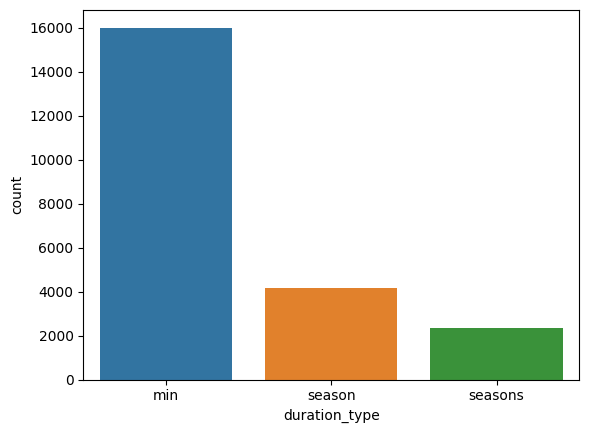

In [19]:
# Verificamos cuantos tipos de duracion hay por medio de graficos
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df_general['duration_type'], data=df_general)
plt.show()

In [20]:
# Se observa que hay 3, pero realmente son dos ya que esta season y seasons
# Por esto se procede a dejar estos dos tipos como uno solo 
df_general['duration_type'] = df_general['duration_type'].replace('seasons', 'season')

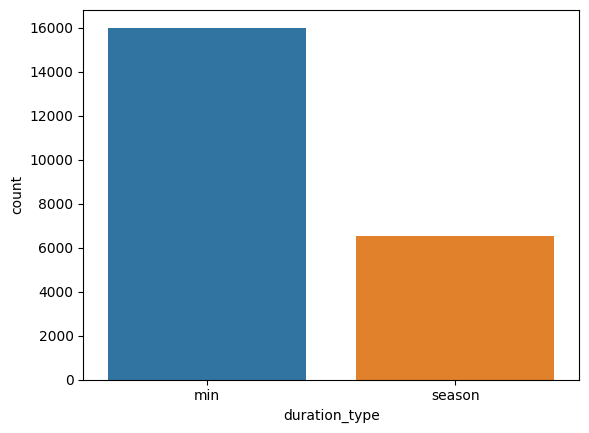

In [21]:
# Rectificamos el cambio
sns.countplot(x=df_general['duration_type'], data=df_general)
plt.show()

In [22]:
# Creamos un nuevo campo el cual tendra los nombres de las plataformas, valor que será util para el proyecto
def optener_plataforma(valor):

    ''' Esta funcion retorna el nombre de la plataforma respecto a la primera 
        letra del parametro que se le pase'''

    if valor.startswith('a'):
        return 'amazon'
    elif valor.startswith('d'):
        return 'disney'
    elif valor.startswith('h'):
        return 'hulu'
    elif valor.startswith('n'):
        return 'netflix'
    else:
        return 'otro'

# Creamos la columna plataforma    
df_general['plataforma'] = df_general['id'].apply(optener_plataforma)

In [23]:
# Se eliminan las cololumnas que se consideran redundantes, en este caso show_id y duration ya que estas fueron
# utilizadas para crear otras columnas con las que si se va a trabjar mas adelante
df_general = df_general.drop(columns=['show_id', 'duration'])

# Aqui se reordenan las columnas id pasando a la primera posicion y duration_int, duration_type en la poscicion que
# que estaba la columna duration
# Esto se hace para el performance 
df_general =df_general.reindex(columns=['id', 'plataforma', 'type', 'title', 'director', 'cast', 'country', 
                                        'date_added',  'release_year', 'rating', 'duration_int', 'duration_type', 
                                        'listed_in', 'description'])

In [24]:
# Para el df_rating agrupamos por la columna movieId por su media, esto con el fin de poder unir mas adelante este df
# con el df_general (el de streaming)
df_rating = round(df_rating.groupby('movieId').mean(), 1)
df_rating = df_rating.reset_index()

In [25]:
# Hacemos un merge al df_general con el df_rating por medio de la columnas en comun (id del df_general y movieId del df_rating)
df_general = pd.merge(df_general,df_rating, left_on='id', right_on='movieId')

In [26]:
# Cambiamos el nombre de la columna rating_y por scored
df_general = df_general.rename(columns={'rating_y': 'scored'})

In [27]:
# Eliminamos la columna movieId ya que es redundante con respecto a la columna id
df_general = df_general.drop(columns=['movieId'])

In [28]:
# Exportamos el fichero en formato csv ya transformado
df_general.to_csv('datos_streaming_transformados.csv', index=False)